In [1]:
from pgmpy.base import DAG

import numpy as np

import pandas as pd

from pgmpy.models import DynamicBayesianNetwork as DBN

This code is using the pgmpy library to create a Dynamic Bayesian Network (DBN) model and fit it to some simulated time-series data.

In time-series analysis, we often model the relationships between variables that change over time. A DBN is a type of probabilistic graphical model that can represent such relationships between variables that change over time.

The code first creates a DBN model object using the DBN class from pgmpy.models. The model is defined by a set of edges connecting nodes that represent variables. The variables in this model are labeled A, B, C, and D. The notation ("A", 0) refers to variable A at time step 0, while ("A", 1) refers to variable A at time step 1. The edges in the model indicate causal relationships between the variables. For example, the edge (("A", 0), ("B", 0)) means that variable A at time 0 has a causal influence on variable B at time 0.

Next, the code generates some simulated time-series data using numpy.random.randint(). The data has 1000 rows (time steps) and 20 columns (variables at different time steps). Each column represents a variable at a particular time step.

Finally, the code creates a pandas DataFrame object from the data and fits the DBN model to the data using the fit() method of the model object. The fit() method uses the data to estimate the parameters of the model, such as the conditional probabilities of each variable given its parent variables at each time step.

In [3]:
model = DBN(

    [

        (("A", 0), ("B", 0)),

        (("A", 0), ("C", 0)),

        (("B", 0), ("D", 0)),

        (("C", 0), ("D", 0)),

        (("A", 0), ("A", 1)),

        (("B", 0), ("B", 1)),

        (("C", 0), ("C", 1)),

        (("D", 0), ("D", 1)),

    ]

)

data = np.random.randint(low=0, high=2, size=(1000, 20))

colnames = []

for t in range(5):

    colnames.extend([("A", t), ("B", t), ("C", t), ("D", t)])

df = pd.DataFrame(data, columns=colnames)

model.fit(df)

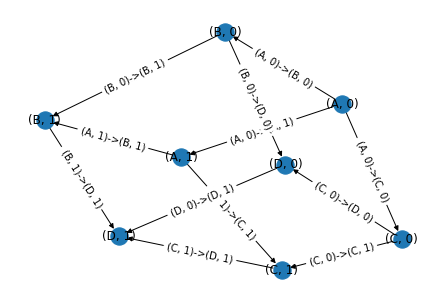

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Get the edges from the DBN model
edges = model.edges()

# Create a directed graph from the edges
G = nx.DiGraph(edges)

# Draw the graph using networkx
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{u}->{v}" for u, v in G.edges()})

# Show the plot
plt.show()


In [6]:
# Get the estimated CPDs for each node in the model
cpds = model.get_cpds()

# Print the CPDs for node A at time step 0
print(cpds[0])


+-----------+--------------------+---------------------+
| (A, 0)    | (A, 0)(0)          | (A, 0)(1)           |
+-----------+--------------------+---------------------+
| (C, 0)(0) | 0.5171256980775801 | 0.5000161955943095  |
+-----------+--------------------+---------------------+
| (C, 0)(1) | 0.4828743019224198 | 0.49998380440569046 |
+-----------+--------------------+---------------------+


This will print the estimated CPDs for node A at time step 0, which represent the probabilities of each possible value of node A given the values of its parent nodes (if any). You can modify this code to print the estimated CPDs for any other node and time step in the model.